# pyschedule - resource-constrained scheduling in python

![](https://github.com/timnon/pyschedule/blob/master/pics/gantt.png)

pyschedule is the easiest way to match tasks with resources. Do you need to plan a conference or schedule your employees and there are a lot of requirements to satisfy, like availability of rooms or maximal allowed working times? Then pyschedule might be for you. Install it with pip:

In [ ]:
pip install pyschedule

Here is a hello world example, you can also find this document as a <a href="https://github.com/timnon/pyschedule-notebooks/blob/master/README.ipynb">notebook</a>. There are more example notebooks <a href="https://github.com/timnon/pyschedule-notebooks/">here</a> and simpler examples in the <a href="https://github.com/timnon/pyschedule/tree/master/examples">examples folder</a>. For a technical overview go to <a href="https://github.com/timnon/pyschedule/blob/master/docs/pyschedule-overview.md">here</a>.

In [7]:
# Load pyschedule and create a scenario with ten steps planning horizon
from pyschedule import Scenario, solvers, plotters
S = Scenario('hello_pyschedule',horizon=10)

# Create two resources
Alice, Bob = S.Resource('Alice'), S.Resource('Bob')

# Create three tasks with lengths 1,2 and 3
cook, wash, clean = S.Task('cook',1), S.Task('wash',2), S.Task('clean',3)

# Assign tasks to resources, either Alice or Bob,
# the %-operator connects tasks and resource
cook += Alice|Bob
wash += Alice|Bob
clean += Alice|Bob

# Solve and print solution
S.use_makespan_objective()
solvers.mip.solve(S,msg=1)

# Print the solution
print(S.solution())

INFO: execution time for solving mip (sec) = 0.05152010917663574
INFO: objective = 3.0
[(clean, Alice, 0, 3), (cook, Bob, 0, 1), (wash, Bob, 1, 3), (MakeSpan, Alice, 3, 4)]


In this example we use a makespan objective which means that we want to minimize the completion time of the last task. Hence, Bob should do the cooking from 0 to 1 and then do the washing from 1 to 3, whereas Alice will only do the cleaning from 0 to 3. This will ensure that both are done after three hours. This table representation is a little hard to read, we can visualize the plan using matplotlib:


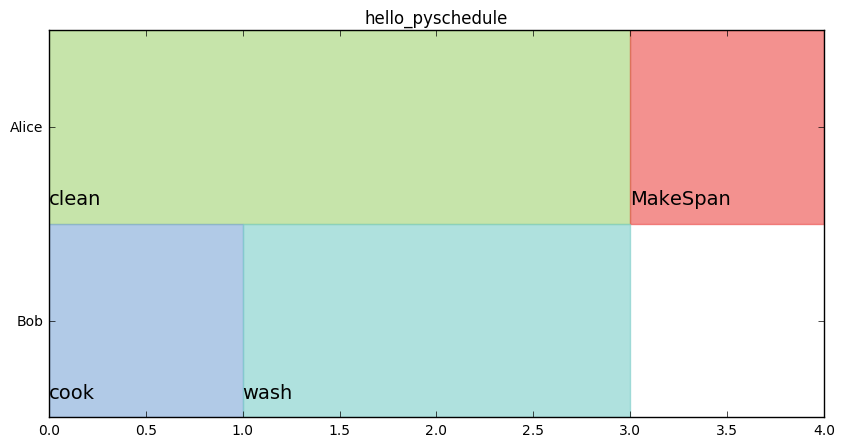

In [8]:
%matplotlib inline
plotters.matplotlib.plot(S,fig_size=(10,5))

pyschedule supports different solvers, classical <a href="https://en.wikipedia.org/wiki/Integer_programming">MIP</a>- as well as <a href="https://en.wikipedia.org/wiki/Constraint_programming">CP</a>-based ones. All solvers and their capabilities are listed in the <a href="https://github.com/timnon/pyschedule/blob/master/docs/pyschedule-overview.md">overview notebook</a>. The default solver used above uses a standard MIP-model in combination with <a href="https://projects.coin-or.org/Cbc">CBC</a>, which is part of package <a href="https://pypi.python.org/pypi/PuLP">pulp</a>. If you have <a href="http://scip.zib.de/">SCIP</a> installed (command "scip" must be running), you can easily switch to SCIP using:

In [9]:
solvers.mip.solve(S,kind='SCIP')

1